In [33]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('white')


In [2]:
# rname = 'results/benchmark_matrix_precip.csv'
# bm_matrix = pd.read_csv(rname, index_col=0, parse_dates=True)

# read benchmark train period
gefs = pd.read_csv('results/benchmark_matrix_precip_apples.csv', index_col=0, parse_dates=True)

In [3]:
rname = 'results/classifier_outcomes_1d_precip_location_final1.csv'
outcomes = pd.read_csv(rname, index_col=0, parse_dates=True)

### Reliability Diagram
https://jmetzen.github.io/2014-08-16/reliability-diagram.html

https://towardsdatascience.com/introduction-to-reliability-diagrams-for-probability-calibration-ed785b3f5d44

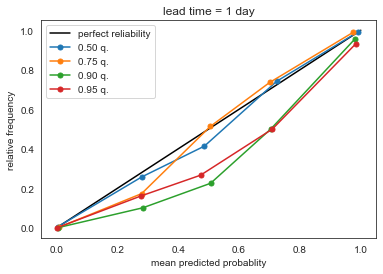

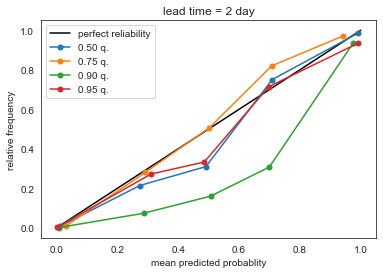

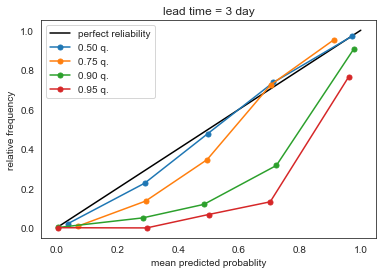

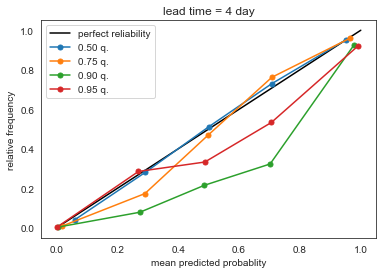

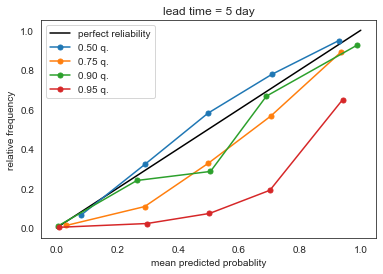

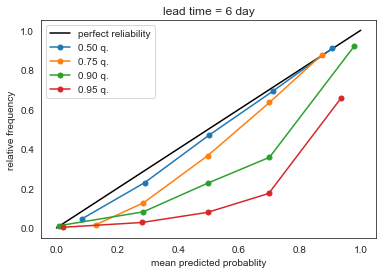

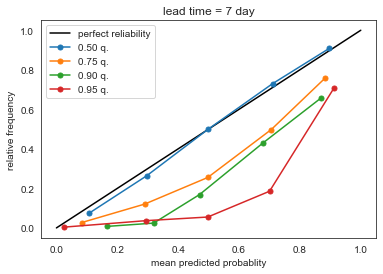

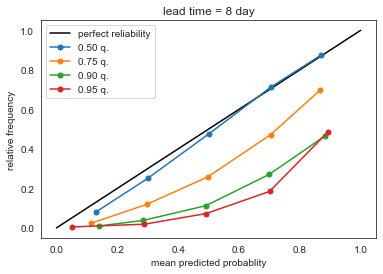

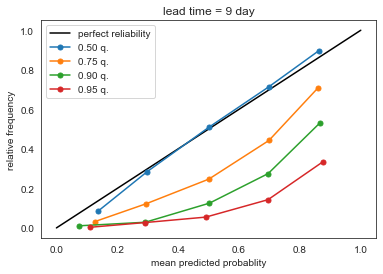

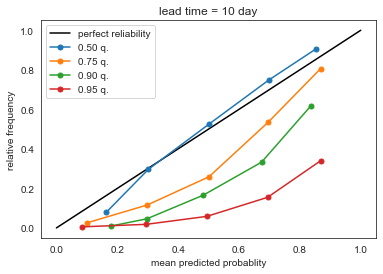

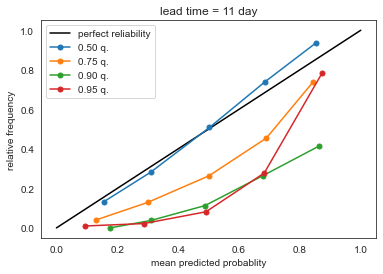

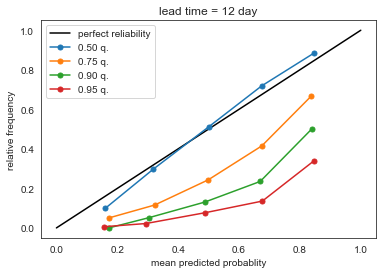

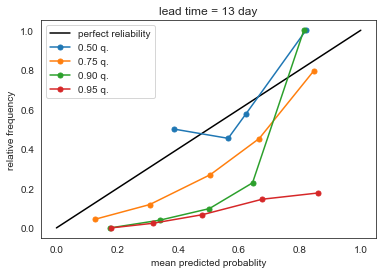

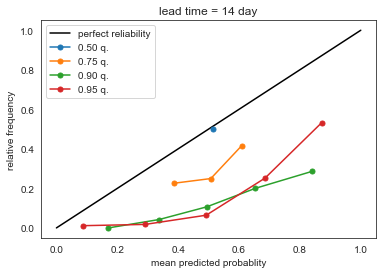

In [68]:
# models = ['CNN', 'MLP']
leads = [d for d in range(14)]
# quantiles = [0.50, 0.75,  0.9, 0.95]
for l in leads:
    reliability_diagram('CNN',l)
    plt.show()

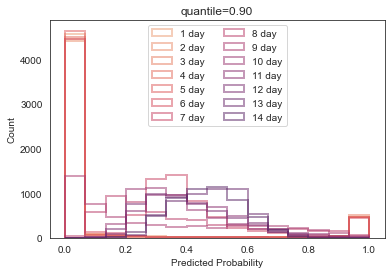

In [69]:
leads = [d for d in range(14)]

probability_histogram_q('CNN', 0.90, leads)

plt.show()

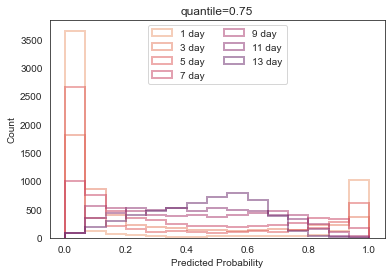

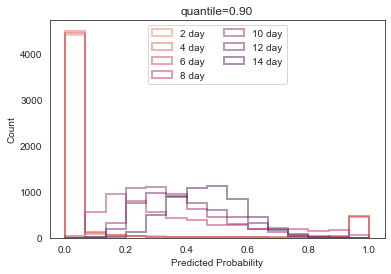

In [72]:
leads = [0,2,4,6,8,10,12]

probability_histogram_q('CNN', 0.75, leads)

plt.show()

leads = [1,3,5,7,9,11,13]

probability_histogram_q('CNN', 0.90, leads)


In [59]:
y_pred = outcomes['%s_%d_%.2f' % ('CNN',10,0.90)]
print(y_pred.min(), y_pred.max())

0.077322274 0.9969046


In [65]:
from sklearn.calibration import calibration_curve

quantiles = [0.50, 0.75, 0.9, 0.95]
def reliability_diagram(m,l):
    
    plt.plot([0, 1], [0, 1], 'k-', label='perfect reliability')
    for q in quantiles:
        y_true = outcomes['ERA5_%.2f' % q]
        y_pred = outcomes['%s_%d_%.2f' % (m,l,q)]
        prob_true, prob_pred = calibration_curve(y_true, y_pred, n_bins=5)

        plt.plot(prob_pred, prob_true, ".-", markersize=10, label='%.2f q.' %q)
    plt.xlabel('mean predicted probablity')
    plt.ylabel('relative frequency')
    plt.title('lead time = %d day' %(l+1))
    plt.legend()

In [66]:
def probability_histogram(m,l):
    for q in quantiles:
        y_pred = outcomes['%s_%d_%.2f' % (m,l,q)]
        plt.hist(y_pred, range=(0, 1), bins=10, label='%.2f q.' %q, histtype="step", lw=2)
    plt.xlabel("Predicted Probability")
    plt.ylabel("Count")
    plt.title('lead time = %d day' %(l+1))
    plt.legend(loc='upper center', ncol=2)

In [67]:
def probability_histogram_q(m,q,leads):
    colors=sns.color_palette("light:#5A9", 14)
    colors=sns.color_palette("flare", 14)

    for l in leads:
        y_pred = outcomes['%s_%d_%.2f' % (m,l,q)]
        plt.hist(y_pred, range=(0, 1), bins=15, label='%d day' %(l+1), histtype="step", lw=2, color=colors[l], alpha=0.5)
    plt.xlabel("Predicted Probability")
    plt.ylabel("Count")
    plt.title('quantile=%.2f' %q)
    plt.legend(loc='upper center', ncol=2)

### Threat Score

In [95]:
numbers = sum(con_outcomes_ana.drop(labels='ERA5', axis=1).values)
pos = 0
TS = {}

leads = [d for d in range(14)]
quantiles = [0.50, 0.75, 0.9, 0.95]
models=['CNN','MLP']

for m in models:
    TS[m] = {}
    for q in quantiles:
        TS[m][q] = []
        for l in leads:
            TS[m][q].append(numbers[pos]/(numbers[pos]+numbers[pos+2]+numbers[pos+3]))
            #TS.loc['%s_%d_%0.2f' % (m, l, q), 0] = numbers[pos]/(numbers[pos]+numbers[pos+2]+numbers[pos+3])
            pos = pos + 4
        

In [123]:
con_outcomes_ana

,ERA5,CNN_0_0.50_TP,CNN_0_0.50_TN,CNN_0_0.50_FP,CNN_0_0.50_FN,CNN_1_0.50_TP,CNN_1_0.50_TN,CNN_1_0.50_FP,CNN_1_0.50_FN,CNN_2_0.50_TP,...,MLP_11_0.95_FP,MLP_11_0.95_FN,MLP_12_0.95_TP,MLP_12_0.95_TN,MLP_12_0.95_FP,MLP_12_0.95_FN,MLP_13_0.95_TP,MLP_13_0.95_TN,MLP_13_0.95_FP,MLP_13_0.95_FN
2011-01-01,0.620895,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2011-01-02,0.907760,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2011-01-03,0.032622,False,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2011-01-04,0.000501,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2011-01-05,0.000145,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.000504,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2019-12-28,0.000050,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2019-12-29,0.187076,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2019-12-30,0.288100,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False


In [124]:
con_precip_bm[-1361:]

,ERA5,GEFS_0_0.50_TP,GEFS_0_0.50_TN,GEFS_0_0.50_FP,GEFS_0_0.50_FN,GEFS_1_0.50_TP,GEFS_1_0.50_TN,GEFS_1_0.50_FP,GEFS_1_0.50_FN,GEFS_2_0.50_TP,...,GEFS_11_0.95_FP,GEFS_11_0.95_FN,GEFS_12_0.95_TP,GEFS_12_0.95_TN,GEFS_12_0.95_FP,GEFS_12_0.95_FN,GEFS_13_0.95_TP,GEFS_13_0.95_TN,GEFS_13_0.95_FP,GEFS_13_0.95_FN
2011-01-01,0.620895,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2011-01-02,0.907760,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2011-01-03,0.032622,False,True,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2011-01-04,0.000501,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2011-01-05,0.000145,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2019-12-27,0.000504,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2019-12-28,0.000050,False,True,False,False,False,True,False,False,False,...,False,False,False,True,False,False,False,True,False,False
2019-12-29,0.187076,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False
2019-12-30,0.288100,True,False,False,False,True,False,False,False,True,...,False,False,False,True,False,False,False,True,False,False


In [126]:
rname = 'results/benchmark_confusion_matrix_apples.csv'
con_precip_bm = pd.read_csv(rname, index_col=0, parse_dates=True)
# con_precip_bm

benchmark_cm = sum(con_precip_bm[-1361:].drop(labels='ERA5', axis=1).values)
pos = 0

leads = [d for d in range(14)]
quantiles = [0.50, 0.75, 0.9, 0.95]
models= ['unbiased_bm']
# ['bm','unbiased_bm']

for m in models:
    TS[m] = {}
    for q in quantiles:
        TS[m][q] = []
        for l in leads:
            TS[m][q].append(benchmark_cm[pos]/(benchmark_cm[pos]+benchmark_cm[pos+2]+benchmark_cm[pos+3]))
            #TS.loc['%s_%d_%0.2f' % (m, l, q), 0] = numbers[pos]/(numbers[pos]+numbers[pos+2]+numbers[pos+3])
            pos = pos + 4

In [127]:
rname = 'results/benchmark_matrix_precip.csv'
outcomes_biased = pd.read_csv(rname, index_col=0, parse_dates=True)

leads = [d for d in range(14)]
#quantiles = [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
quantiles = [0.50, 0.75, 0.9, 0.95]
points = pd.DataFrame(index=leads)
con_outcomes_biased = pd.DataFrame(outcomes_biased['ERA5']) #'ERA5'
for q in quantiles:
    for l in leads:
        label = outcomes_biased['ERA5_%0.2f' % q] #'ERA5'
        pred =  outcomes_biased['GEFS_%d_%0.2f' % (l, q)]
        TP = (label&pred)
        con_outcomes_biased['GEFS_%d_%0.2f_TP' % (l, q)] = TP
        TN = (~label&~pred)
        con_outcomes_biased['GEFS_%d_%0.2f_TN' % (l, q)] = TN
        FP = (~label&pred)
        con_outcomes_biased['GEFS_%d_%0.2f_FP' % (l, q)] = FP
        FN = (label&~pred)
        con_outcomes_biased['GEFS_%d_%0.2f_FN' % (l, q)] = FN

In [129]:
#con_outcomes_biased


benchmark_cm = sum(con_outcomes_biased[-1361:].drop(labels='ERA5', axis=1).values)
pos = 0

leads = [d for d in range(14)]
quantiles = [0.50, 0.75, 0.9, 0.95]
models= ['bm']
# ['bm','unbiased_bm']

for m in models:
    TS[m] = {}
    for q in quantiles:
        TS[m][q] = []
        for l in leads:
            TS[m][q].append(benchmark_cm[pos]/(benchmark_cm[pos]+benchmark_cm[pos+2]+benchmark_cm[pos+3]))
            #TS.loc['%s_%d_%0.2f' % (m, l, q), 0] = numbers[pos]/(numbers[pos]+numbers[pos+2]+numbers[pos+3])
            pos = pos + 4

In [130]:
#TS = pd.DataFrame(index=outcomes_ana.columns[2:])
TS

{'CNN': {0.5: [0.9135618479880775,
   0.880057803468208,
   0.8629943502824858,
   0.8191933240611962,
   0.7469050894085282,
   0.7139303482587065,
   0.6561712846347607,
   0.6400966183574879,
   0.579136690647482,
   0.5235732009925558,
   0.5052264808362369,
   0.4718714121699196,
   0.4721189591078067,
   0.4615958240119314],
  0.75: [0.8803418803418803,
   0.8379888268156425,
   0.7593984962406015,
   0.7142857142857143,
   0.6328828828828829,
   0.5655021834061136,
   0.4770992366412214,
   0.454855195911414,
   0.3785488958990536,
   0.36195286195286197,
   0.34488188976377954,
   0.3036723163841808,
   0.2976878612716763,
   0.2652370203160271],
  0.9: [0.8209876543209876,
   0.711864406779661,
   0.6737967914438503,
   0.5736040609137056,
   0.5,
   0.4187192118226601,
   0.34701492537313433,
   0.2945945945945946,
   0.23325062034739455,
   0.2361111111111111,
   0.2240566037735849,
   0.2025974025974026,
   0.15870307167235495,
   0.141804788213628],
  0.95: [0.720430107526

In [138]:
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [6.5, 4.5]


def plot_TS():
#     gefs_benchmark = pickle.load(open('results/gefs_benchmark_precip.pkl', 'rb'))
#     corrected_gefs_benchmark = pickle.load(open('results/gefs_benchmark_precip_apples.pkl', 'rb'))# then plot
#     results = pickle.load(open('results/f1scores_%s.pkl' % key, 'rb'))

#    quantiles = [0.50, 0.75, 0.9, 0.95, 0.80, 0.85, 0.9, 0.95]

    quantiles = [0.50, 0.75, 0.9, 0.95] 
    models = ['CNN', 'MLP', 'bm','unbiased_bm']
    leads = [d for d in range(14)]

    for i,q in enumerate(quantiles):
#        plt.subplot(2,3,i+1)

        plt.subplot(2,2,i+1)
        plt.title('quantile %0.2f' % q, fontsize=8)
        
#        no_skill = np.array([(1-q) for d in leads])       
#        plt.plot(np.array(leads)+1, np.array(no_skill), '--', color='0.5', linewidth = 1)
        
        for m in models:
            plt.plot(np.array(leads)+1, TS[m][q], '--', linewidth = 1)

       
        plt.xlabel('Lead time (days)', fontsize=8)
        plt.ylabel('F1 Score', fontsize=8)
        plt.xticks(np.arange(min(leads)+2, max(leads)+2, 2.0), fontsize = 7)
        plt.yticks(fontsize = 7)

        plt.ylim([0,1])

        if i==0:
            plt.ylim([0.2,1])
            plt.legend(['CNN', 'MLP', 'bm','unbiased_bm'],
                       ncol=2, loc='lower center', fontsize=7)
        if i==1:
            plt.ylim([0.2,1])
         

    plt.tight_layout()
    plt.show()

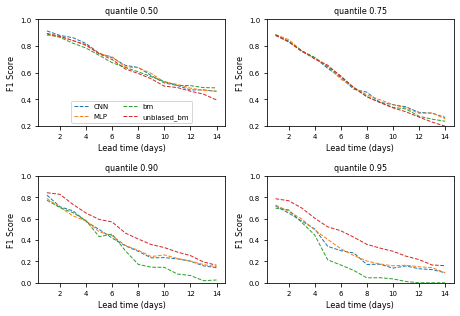

In [139]:
plot_TS()

### ROC

In [2]:
from sklearn.metrics import roc_curve
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import confusion_matrix
from sklearn.metrics import auc
from sklearn.metrics import f1_score
import h5py
import numpy as np
import pandas as pd
import pickle
import sys
import matplotlib.pyplot as plt

In [3]:
key = '1d_precip_location_final1'
rname = 'results/classifier_outcomes_%s.csv' % key
outcomes = pd.read_csv(rname, index_col=0, parse_dates=True)
outcomes = outcomes[3932:]
outcomes.shape

(1361, 117)

In [17]:
outcomes.columns[50:]

Index(['MLP_9_0.75', 'CNN_10_0.75', 'MLP_10_0.75', 'CNN_11_0.75',
       'MLP_11_0.75', 'CNN_12_0.75', 'MLP_12_0.75', 'CNN_13_0.75',
       'MLP_13_0.75', 'ERA5_0.90', 'CNN_0_0.90', 'MLP_0_0.90', 'CNN_1_0.90',
       'MLP_1_0.90', 'CNN_2_0.90', 'MLP_2_0.90', 'CNN_3_0.90', 'MLP_3_0.90',
       'CNN_4_0.90', 'MLP_4_0.90', 'CNN_5_0.90', 'MLP_5_0.90', 'CNN_6_0.90',
       'MLP_6_0.90', 'CNN_7_0.90', 'MLP_7_0.90', 'CNN_8_0.90', 'MLP_8_0.90',
       'CNN_9_0.90', 'MLP_9_0.90', 'CNN_10_0.90', 'MLP_10_0.90', 'CNN_11_0.90',
       'MLP_11_0.90', 'CNN_12_0.90', 'MLP_12_0.90', 'CNN_13_0.90',
       'MLP_13_0.90', 'ERA5_0.95', 'CNN_0_0.95', 'MLP_0_0.95', 'CNN_1_0.95',
       'MLP_1_0.95', 'CNN_2_0.95', 'MLP_2_0.95', 'CNN_3_0.95', 'MLP_3_0.95',
       'CNN_4_0.95', 'MLP_4_0.95', 'CNN_5_0.95', 'MLP_5_0.95', 'CNN_6_0.95',
       'MLP_6_0.95', 'CNN_7_0.95', 'MLP_7_0.95', 'CNN_8_0.95', 'MLP_8_0.95',
       'CNN_9_0.95', 'MLP_9_0.95', 'CNN_10_0.95', 'MLP_10_0.95', 'CNN_11_0.95',
       'MLP_11_0.95', 'C

In [31]:
roc_q = 0.90
roc_m = 'CNN'

In [6]:
def roc_curve_prep(roc_q, roc_m):
    fpr, tpr = dict(), dict()
    precision, recall = dict(), dict()
    auc_score, f1 = dict(), dict()
    for i in range(14):
        fpr['%d' %i], tpr['%d' %i], _ = roc_curve(outcomes['ERA5_%.2f' %roc_q], outcomes['%s_%d_%.2f' %(roc_m, i, roc_q)])
        precision['%d' %i], recall['%d' %i], _ = precision_recall_curve(outcomes['ERA5_%.2f' %roc_q], outcomes['%s_%d_%.2f' %(roc_m, i, roc_q)])
        auc_score['%d' %i] = np.round(auc(fpr['%d' %i], tpr['%d' %i]),4)
        f1['%d' %i] = np.round(f1_score(outcomes['ERA5_%.2f' %roc_q], (outcomes['%s_%d_%.2f' %(roc_m, i, roc_q)]> 0.5)),4)
    return fpr, tpr, precision, recall, auc_score, f1

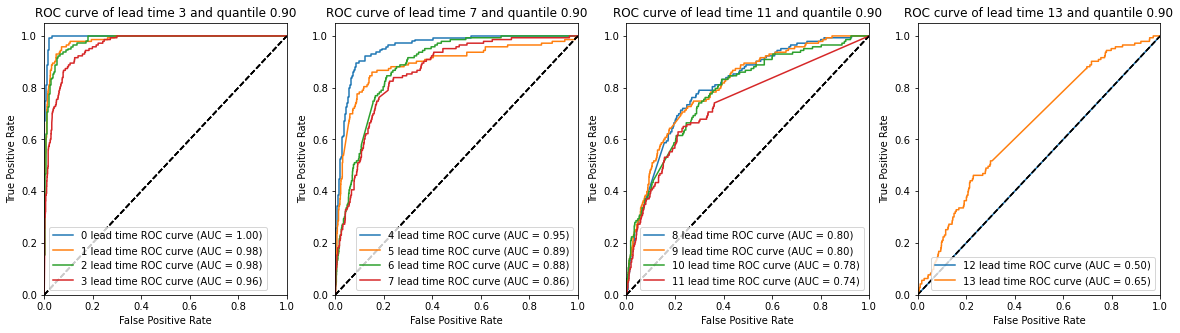

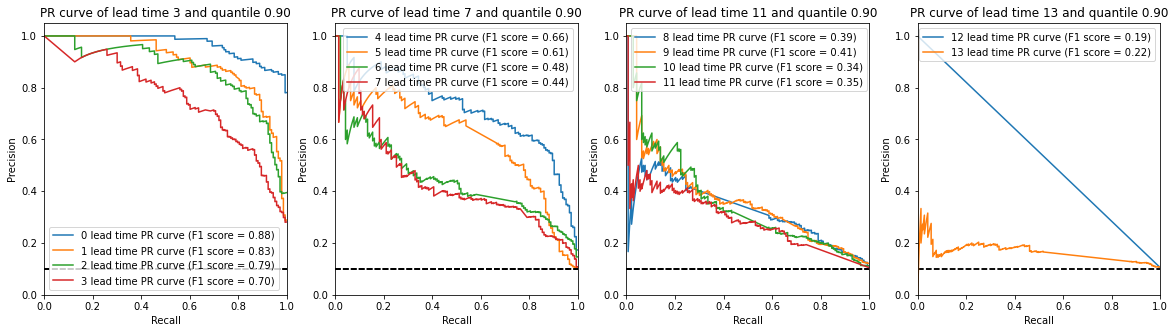

In [113]:
#location_std2 DONT Rerun!!!!!!!!!!!!!!!!!!11
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)
roc_plot(roc_q)

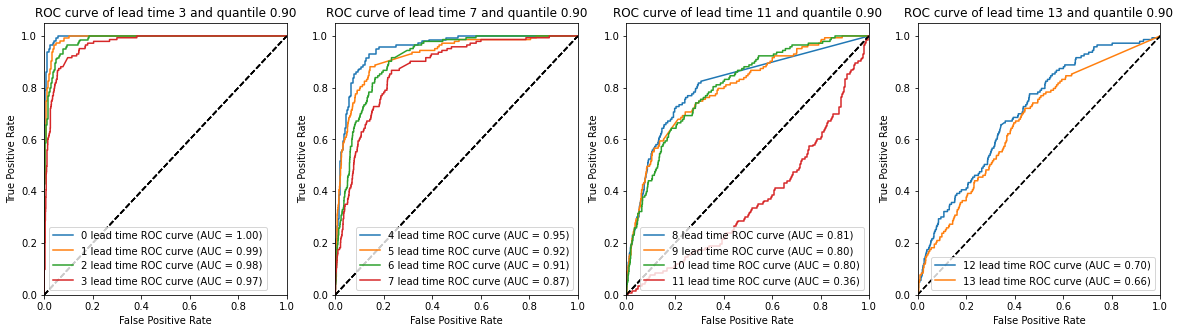

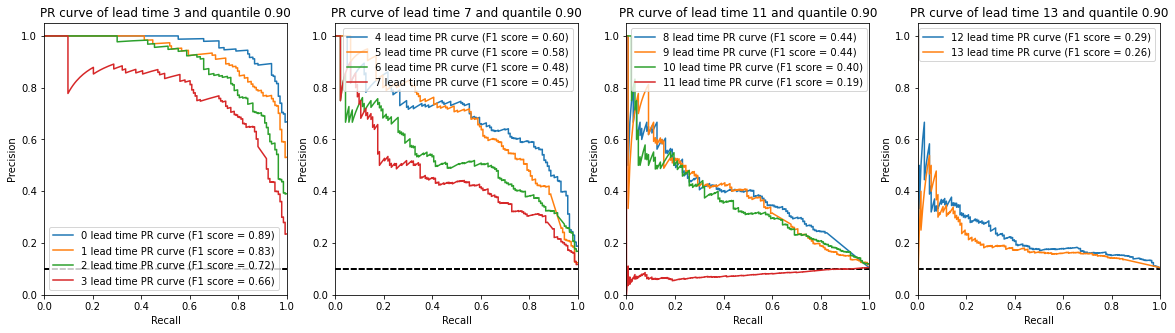

In [9]:
#location_nonstd3 DONT Rerun!!!!!!!!!!!!!!!!!!
roc_q = 0.90
roc_m = 'CNN'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)
roc_plot(roc_q)

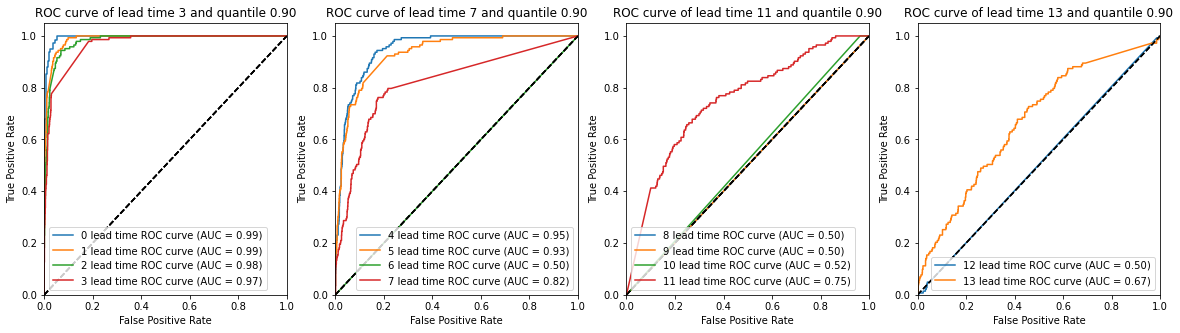

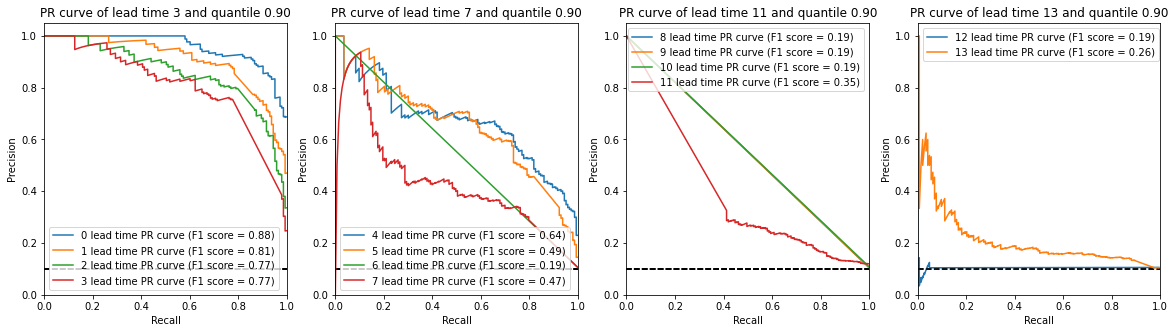

In [117]:
#location_v9 DONT Rerun!!!!!!!!!!!!!!!!!!
roc_q = 0.90
roc_m = 'CNN'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)
roc_plot(roc_q)

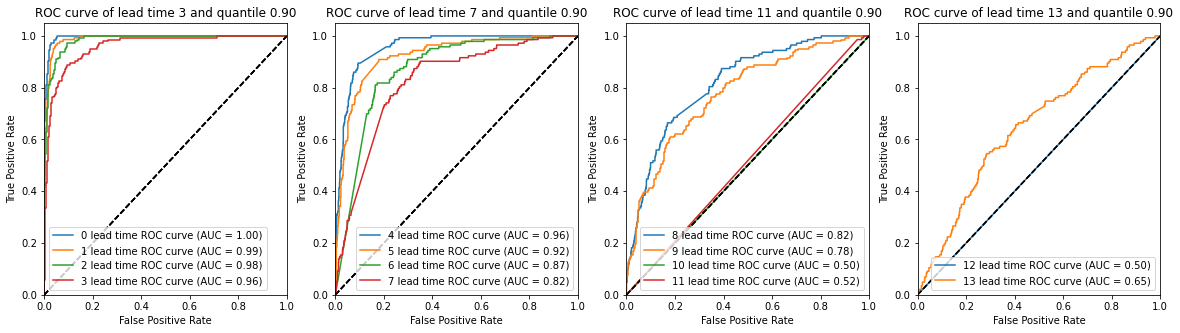

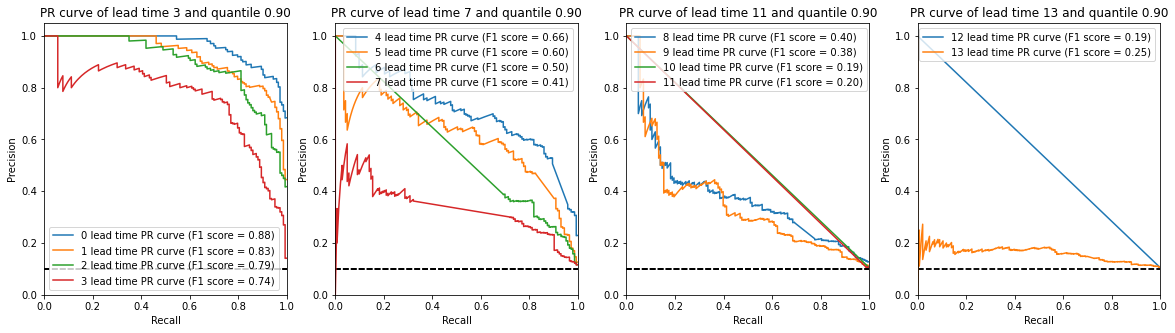

In [121]:
#location_v10 DONT Rerun!!!!!!!!!!!!!!!!!!
roc_q = 0.90
roc_m = 'CNN'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)
roc_plot(roc_q)

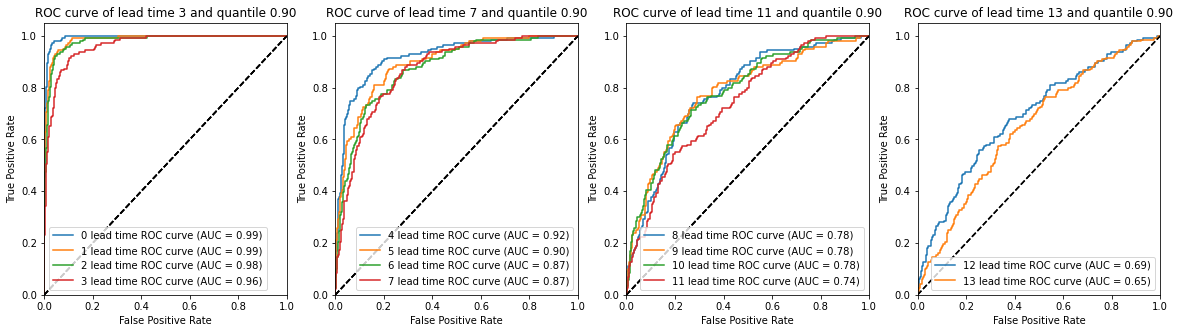

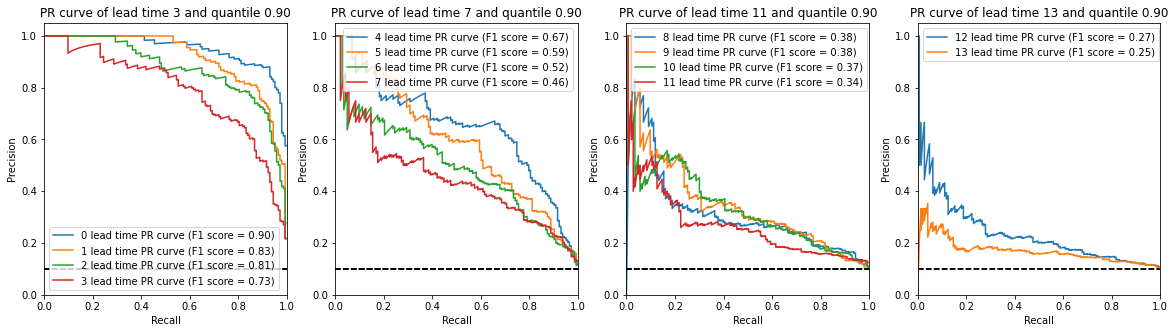

In [61]:
#newly picked final model DONT Rerun!!!!!!!!!!!!!!!!!!
roc_q = 0.90
roc_m = 'CNN'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)
roc_plot(roc_q)

In [7]:
# benchmark confusion matrix
rname = 'results/benchmark_confusion_matrix_apples.csv'
con_precip_bm = pd.read_csv(rname, index_col=0, parse_dates=True)

In [32]:
# ROC matrix for benchmark at a certain Quantile
BM_dot = []
leads = [d for d in range(14)]
for l in leads:
    TP = int(con_precip_bm[3932:].filter(regex='_%d_%0.2f_TP' %(l, roc_q)).sum(axis=0))
    TN = int(con_precip_bm[3932:].filter(regex='_%d_%0.2f_TN' %(l, roc_q)).sum(axis=0))
    FP = int(con_precip_bm[3932:].filter(regex='_%d_%0.2f_FP' %(l, roc_q)).sum(axis=0))
    FN = int(con_precip_bm[3932:].filter(regex='_%d_%0.2f_FN' %(l, roc_q)).sum(axis=0))
    TPR = TP/(TP+FN)     # TP rate = TP/TP+FN
    FPR = FP/(FP+TN)     # FP rate = FP/FP+TN
    BM_dot.append([FPR,TPR])

In [18]:
# create confusion matrix for outcome matrix at all quantiles
# create ROC matrix for outcome as well - points
outcomes_ana = outcomes.copy() # here outcomes is for test period
for col in outcomes_ana.columns[1:]:
    if outcomes_ana[col].dtypes == 'float64':
        outcomes_ana[col] = (outcomes_ana[col]> 0.5)

leads = [d for d in range(14)]
#quantiles = [0.50, 0.75, 0.80, 0.85, 0.9, 0.95]
quantiles = [0.50, 0.75, 0.9, 0.95]
points = pd.DataFrame(index=leads)
con_outcomes_ana = pd.DataFrame(outcomes_ana['ERA5']) #'ERA5'
models=['CNN','MLP']
for m in models:
    for q in quantiles:
        points['%s_%0.2f_TPR' % (m, q)] = leads
        points['%s_%0.2f_FPR' % (m, q)] = leads
        for l in leads:
            label = outcomes_ana['ERA5_%0.2f' % q] #'ERA5'
            pred =  outcomes_ana['%s_%d_%0.2f' % (m, l, q)]
            TP = (label&pred)
            con_outcomes_ana['%s_%d_%0.2f_TP' % (m, l, q)] = TP
            TN = (~label&~pred)
            con_outcomes_ana['%s_%d_%0.2f_TN' % (m, l, q)] = TN
            FP = (~label&pred)
            con_outcomes_ana['%s_%d_%0.2f_FP' % (m, l, q)] = FP
            FN = (label&~pred)
            con_outcomes_ana['%s_%d_%0.2f_FN' % (m, l, q)] = FN
            # TP rate = TP/TP+FN
            TPR = np.sum(TP)/(np.sum(TP)+np.sum(FN))
            # FP rate = FP/FP+TN
            FPR = np.sum(FP)/(np.sum(FP)+np.sum(TN))
            points.loc[l,'%s_%0.2f_TPR' % (m, q)] = TPR
            points.loc[l,'%s_%0.2f_FPR' % (m, q)] = FPR

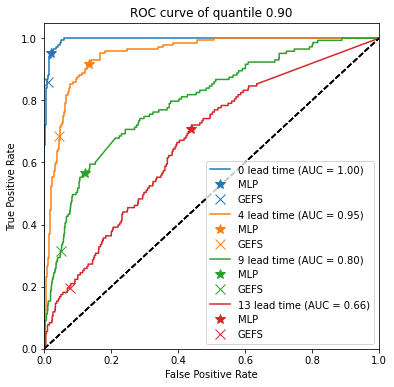

In [29]:
# Dont rerun for location v10!!!!!!!!!!!!!!!!!!!!!!!
# this was test period results
lts = [0,4,9,13]

plt.rcParams['figure.figsize'] = [6, 6]

colors=['C0','C1','C2','C3', 'C4']
for i,l in enumerate(lts):
    plt.plot(fpr['%d' %l], tpr['%d' %l], color=colors[i], label='%d lead time (AUC = %0.2f)' %(l, auc_score['%d' %l]))
    plt.plot(points.loc[l,'%s_%0.2f_FPR' % (roc_m, roc_q)], points.loc[l,'%s_%0.2f_TPR' % (roc_m, roc_q)], "*", markersize=10, color=colors[i], label='%s' %roc_m)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(BM_dot[l][0],BM_dot[l][1], "x", markersize=10, color=colors[i], label='GEFS')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC curve of quantile %0.2f' % roc_q)
    plt.legend(loc="best")
plt.savefig('/final_figures/5.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/5.png')
plt.show()

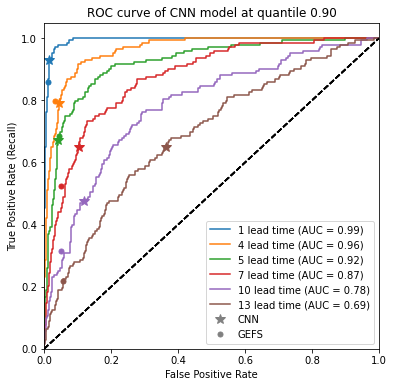

In [34]:
roc_q = 0.90
roc_m = 'CNN'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)

lts = [0,3,4,6,9,12]

plt.rcParams['figure.figsize'] = [6, 6]

colors=['C0','C1','C2','C3', 'C4', 'C5']
for i,l in enumerate(lts):
    plt.plot(fpr['%d' %l], tpr['%d' %l], color=colors[i], label='%d lead time (AUC = %0.2f)' %(l+1, auc_score['%d' %l]))
    plt.plot(points.loc[l,'%s_%0.2f_FPR' % (roc_m, roc_q)], points.loc[l,'%s_%0.2f_TPR' % (roc_m, roc_q)], "*", markersize=10, color=colors[i])#, label='%s' %roc_m)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(BM_dot[l][0],BM_dot[l][1], ".", markersize=10, color=colors[i]) #, label='GEFS')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
plt.plot(2,2, "*", markersize=10, color='gray', label='%s' %roc_m)
plt.plot(2,2, ".", markersize=10, color='gray', label='GEFS')   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve of %s model at quantile %0.2f' % (roc_m, roc_q))
plt.legend(loc="best")
plt.savefig('/final_figures/5_1.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/5_1.png')
plt.show()

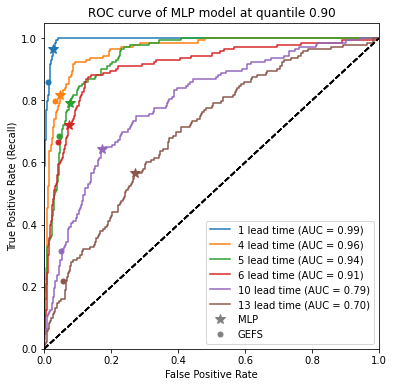

In [35]:
roc_q = 0.90
roc_m = 'MLP'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)

lts = [0,3,4,5,9,12]

plt.rcParams['figure.figsize'] = [6, 6]

colors=['C0','C1','C2','C3', 'C4', 'C5']
for i,l in enumerate(lts):
    plt.plot(fpr['%d' %l], tpr['%d' %l], color=colors[i], label='%d lead time (AUC = %0.2f)' %(l+1, auc_score['%d' %l]))
    plt.plot(points.loc[l,'%s_%0.2f_FPR' % (roc_m, roc_q)], points.loc[l,'%s_%0.2f_TPR' % (roc_m, roc_q)], "*", markersize=10, color=colors[i])#, label='%s' %roc_m)
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(BM_dot[l][0],BM_dot[l][1], ".", markersize=10, color=colors[i]) #, label='GEFS')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
plt.plot(2,2, "*", markersize=10, color='gray', label='%s' %roc_m)
plt.plot(2,2, ".", markersize=10, color='gray', label='GEFS')   
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate (Recall)')
plt.title('ROC curve of %s model at quantile %0.2f' % (roc_m, roc_q))
plt.legend(loc="best")
plt.savefig('/final_figures/5_2.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/5_2.png')
plt.show()

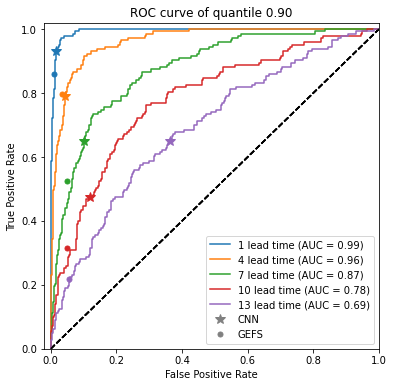

In [104]:
# Dont rerun for newly tuned final models!!!!!!!!!!!!!!!!!!!!!!!

lts = [0,3,6,9,12]

roc_m = 'CNN'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)

plt.rcParams['figure.figsize'] = [6, 6]

colors=['C0','C1','C2','C3', 'C4']
for i,l in enumerate(lts):
    plt.plot(fpr['%d' %l], tpr['%d' %l], color=colors[i], label='%d lead time (AUC = %0.2f)' %(l+1, auc_score['%d' %l]))
    plt.plot(points.loc[l,'%s_%0.2f_FPR' % (roc_m, roc_q)], points.loc[l,'%s_%0.2f_TPR' % (roc_m, roc_q)], "*", markersize=10, color=colors[i])#, label='CNN')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(BM_dot[l][0],BM_dot[l][1], ".", markersize=10, color=colors[i])#, label='GEFS')

    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.02])

plt.plot(2,2, "*", markersize=10, color='gray', label='%s' %roc_m)
plt.plot(2,2, ".", markersize=10, color='gray', label='GEFS')    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of quantile %0.2f' % roc_q)
plt.legend(loc="best")

plt.savefig('/final_figures/7.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/7.png')
plt.show()

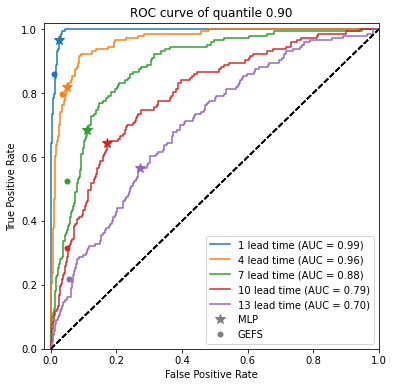

In [103]:
# Dont rerun for newly tuned final models!!!!!!!!!!!!!!!!!!!!!!!
roc_m = 'MLP'
fpr, tpr, precision, recall, auc_score, f1 = roc_curve_prep(roc_q, roc_m)

lts = [0,3,6,9,12]#,5,6,7,8,9,10,11,12,13]

plt.rcParams['figure.figsize'] = [6, 6]

colors=['C0','C1','C2','C3', 'C4']
for i,l in enumerate(lts):
    plt.plot(fpr['%d' %l], tpr['%d' %l], color=colors[i], label='%d lead time (AUC = %0.2f)' %(l+1, auc_score['%d' %l]))
    plt.plot(points.loc[l,'%s_%0.2f_FPR' % (roc_m, roc_q)], points.loc[l,'%s_%0.2f_TPR' % (roc_m, roc_q)], "*", markersize=10, color=colors[i])#, label='CNN')
    plt.plot([0, 1], [0, 1], 'k--')
    plt.plot(BM_dot[l][0],BM_dot[l][1], ".", markersize=10, color=colors[i])#, label='GEFS')

    plt.xlim([-0.02, 1.0])
    plt.ylim([0.0, 1.02])

plt.plot(2,2, "*", markersize=10, color='gray', label='%s' %roc_m)
plt.plot(2,2, ".", markersize=10, color='gray', label='GEFS')    
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC curve of quantile %0.2f' % roc_q)
plt.legend(loc="best")

plt.savefig('/final_figures/7.svg', format='svg', dpi=1200)
plt.savefig('/final_figures/7.png')
plt.show()

---
### Functions

### 原版

In [3]:
def create_con_matrix_vs_benchmark(key):
    rname = 'results/classifier_outcomes_%s.csv' % key
    outcomes = pd.read_csv(rname, index_col=0, parse_dates=True)
    binary_outcomes = outcomes.copy()
    for col in outcomes.columns[1:]:
        if outcomes[col].dtypes == 'float64':
            binary_outcomes[col] = (outcomes[col]> 0.5)


    con_precip_vs = pd.DataFrame(gefs['ERA5']) #'ERA5'

    for q in quantiles:
        for l in leads:
            label = gefs['ERA5_%0.2f' % q] #'ERA5'
            bm_pred =  gefs['GEFS_%d_%0.2f' % (l, q)]
            m_pred = pred =  binary_outcomes['CNN_%d_%0.2f' % (l, q)] # this draws from stored variable - binary_outcomes 
            con_precip_vs['VS_%d_%0.2f_PPN' % (l, q)] = (label&m_pred&~bm_pred) # corrected wrong bm_pred
            con_precip_vs['VS_%d_%0.2f_NNP' % (l, q)] = (~label&~m_pred&bm_pred)
            con_precip_vs['VS_%d_%0.2f_PPP' % (l, q)] = (label&m_pred&bm_pred) # good as always
            con_precip_vs['VS_%d_%0.2f_NNN' % (l, q)] = (~label&~m_pred&~bm_pred) # good as always
            con_precip_vs['VS_%d_%0.2f_NPP' % (l, q)] = (~label&m_pred&bm_pred) # unchanged bad pred
            con_precip_vs['VS_%d_%0.2f_PNN' % (l, q)] = (label&~m_pred&~bm_pred) # unchanged bad pred
            con_precip_vs['VS_%d_%0.2f_NPN' % (l, q)] = (~label&m_pred&~bm_pred) # change good bm_pred to incorrect because of FP
            con_precip_vs['VS_%d_%0.2f_PNP' % (l, q)] = (label&~m_pred&bm_pred) # changed good bm_pred to incorrect because of FN
             
    return con_precip_vs

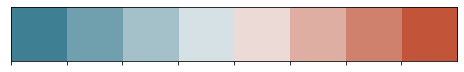

In [9]:
# find colors

#diverging_colors = sns.color_palette("coolwarm", 8)

diverging_colors =  sns.diverging_palette(220, 20, n=8)
sns.palplot(sns.diverging_palette(220, 20, n=8))

# sns.palplot(diverging_colors)

# PPN NNP PPP NNN NPP PNN NPN PNP
diverging_colors = sns.color_palette("RdBu_r", 8)


In [33]:
#con_precip_vs
import seaborn as sns
quantiles = [0.50, 0.75, 0.9, 0.95]

def aggregate_lt(lt):
    Test_df = con_precip_vs.filter(regex='_%d_' %lt)
    Test_df.sum()
    a = np.reshape(Test_df.sum().values,(-1, 8))
    df_vs_quantile = pd.DataFrame(a, index=quantiles, columns=["PPN", "NNP", "PPP", "NNN", "NPP", "PNN", "NPN", "PNP"])                                                                          
#    df_vs_quantile
    plt.rcParams['figure.figsize'] = [10, 4]
#     color_id = [6, 3, 5, 2, 8] #green #red #orange #purple #grey
#     # gray unchanged correct prediction
#     # green changed to correct prediction 
#     # red changed to incorrect prediction because of FN
#     # purple stayed as incorrect prediction
#     # orange changed to incorrect prediction because of FP
#     qualitative_colors = sns.color_palette("Set3", 9)
#     qualitative_colors = [qualitative_colors[i] for i in color_id]
    df_vs_quantile = df_vs_quantile.divide(df_vs_quantile.sum(axis=1), axis=0)*100

    df_vs_quantile.plot.area(color=diverging_colors, title="Percentage of classfication results of lead time=%d days" %(lt+1))
    plt.xticks(df_vs_quantile.index)

In [7]:
#con_precip_vs
import seaborn as sns
quantiles = [0.50, 0.75, 0.9, 0.95]

def aggregate_lt_2017(lt):
    Test_df = con_precip_vs["2016-11-01":"2017-3-31"].filter(regex='_%d_' %lt)
    Test_df.sum()
    a = np.reshape(Test_df.sum().values,(-1, 8))
    df_vs_quantile = pd.DataFrame(a, index=quantiles, columns=["PPN", "NNP", "PPP", "NNN", "NPP", "PNN", "NPN", "PNP"])                                                                          
#    df_vs_quantile
    plt.rcParams['figure.figsize'] = [10, 4]
#     color_id = [6, 3, 5, 2, 8] #green #red #orange #purple #grey
#     # gray unchanged correct prediction
#     # green changed to correct prediction 
#     # red changed to incorrect prediction because of FN
#     # purple stayed as incorrect prediction
#     # orange changed to incorrect prediction because of FP
#     qualitative_colors = sns.color_palette("Set3", 9)
#     qualitative_colors = [qualitative_colors[i] for i in color_id]
    df_vs_quantile = df_vs_quantile.divide(df_vs_quantile.sum(axis=1), axis=0)*100

    df_vs_quantile.plot.area(color=diverging_colors, title="Percentage of classfication results of lead time=%d days" %(lt+1))
    plt.xticks(df_vs_quantile.index)
    plt.show()

In [8]:
def roc_plot(roc_q):
    # this was test period results

    import warnings
    warnings.filterwarnings('ignore')

    plt.rcParams['figure.figsize'] = [20, 5]

    for i in range(14):
        plt.subplot(1,4,i//4+1)
        plt.plot(fpr['%d' %i], tpr['%d' %i], label='%d lead time ROC curve (AUC = %0.2f)' %(i, auc_score['%d' %i]))
        plt.plot([0, 1], [0, 1], 'k--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title('ROC curve of lead time %d and quantile %0.2f' %(i, roc_q))
        plt.legend(loc="best")
    plt.show()

    for i in range(14):
        plt.subplot(1,4,i//4+1)
        no_skill = 0.1
        plt.plot([0, 1], [no_skill, no_skill], 'k--')
        plt.plot(recall['%d' %i], precision['%d' %i], label='%d lead time PR curve (F1 score = %0.2f)' % (i, f1['%d' %i]))
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title('PR curve of lead time %d and quantile %0.2f' %(i, roc_q))
        plt.legend(loc="best")
    plt.show()